In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import t
from sklearn.model_selection import train_test_split
from sklearn import linear_model, preprocessing
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [2]:
data = pd.read_csv("T1.csv")

In [3]:
data.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645904,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


In [4]:
#data = data[(data["Wind Speed (m/s)"] >= 0) & (data["LV ActivePower (kW)"] >= 0) & (data["Theoretical_Power_Curve (KWh)"]>=0) & (data["Wind Direction (°)"]>=0)]

# In this part we get rid of the values which under 0 because all the data must be greater than 0 or equal to 0

In [5]:

data['Date/Time'] = pd.to_datetime(data['Date/Time'])


print(data['Date/Time'].head())

# Extract month, day of the week, and year
data['Month'] = data['Date/Time'].dt.month
data['DayOfWeek'] = data['Date/Time'].dt.dayofweek
data['Year'] = data['Date/Time'].dt.year
data.drop(columns=['Date/Time'], inplace=True)


0   2018-01-01 00:00:00
1   2018-01-01 00:10:00
2   2018-01-01 00:20:00
3   2018-01-01 00:30:00
4   2018-01-01 00:40:00
Name: Date/Time, dtype: datetime64[ns]


In [6]:
scaler = StandardScaler()

scaled_features = scaler.fit_transform(data)

scaled_data = pd.DataFrame(scaled_features,columns=data.columns)

print(scaled_data.head())


   LV ActivePower (kW)  Wind Speed (m/s)  Theoretical_Power_Curve (KWh)  \
0            -0.706800         -0.531476                      -0.786435   
1            -0.650629         -0.446115                      -0.710712   
2            -0.762932         -0.554021                      -0.805023   
3            -0.676628         -0.449071                      -0.713483   
4            -0.706340         -0.468406                      -0.731337   

   Wind Direction (°)     Month  DayOfWeek  Year  
0            1.458725 -1.639044  -1.488416   0.0  
1            1.551254 -1.639044  -1.488416   0.0  
2            1.593244 -1.639044  -1.488416   0.0  
3            1.579260 -1.639044  -1.488416   0.0  
4            1.519504 -1.639044  -1.488416   0.0  


# LinearRegression

In [7]:
from sklearn.linear_model import LinearRegression

X = scaled_data.drop(["LV ActivePower (kW)"],axis=1)
y = scaled_data[["LV ActivePower (kW)"]]
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 123)

# Initialize a linear regression model
lin_reg = LinearRegression()

# Fit the model to the training data
lin_reg.fit(X_train, y_train)

# Predict on the test data
y_pred = lin_reg.predict(X_test)

Accuracy_linear = lin_reg.score(X_test, y_test)
print("Accuracy:",Accuracy_linear)

print(100*"*")

kf = KFold(n_splits=6, shuffle=True, random_state=42)

cv_results = cross_val_score(lin_reg,X_test,y_test,cv=kf)
print(cv_results)

print('Mean cross validation test score: ', np.mean(cv_results))


Accuracy: 0.9086782213482326
****************************************************************************************************
[0.90213618 0.91150906 0.92008136 0.90833396 0.90648164 0.90307607]
Mean cross validation test score:  0.9086030443199796


The R^2 score of approximately 0.906 indicates that the linear regression model explains about 90.6% of the variance in the target variable on the test data.

# Making a Linear Regression model: our second model: Ordinary Least Squares (OLS)

In [8]:
X = scaled_data.drop(["LV ActivePower (kW)"],axis=1)
X = sm.add_constant(X)
y = scaled_data[["LV ActivePower (kW)"]]


# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 123)

rModel = sm.OLS(y_train, X_train)
# Fit the model
rModel_results = rModel.fit()
# Evaluate the model
rModel_results.summary()

C:\Users\16088\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1965: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     LV ActivePower (kW)   R-squared:                       0.907
Model:                             OLS   Adj. R-squared:                  0.907
Method:                  Least Squares   F-statistic:                 7.895e+04
Date:                 Sat, 20 Apr 2024   Prob (F-statistic):               0.00
Time:                         16:59:16   Log-Likelihood:                -9329.5
No. Observations:                40424   AIC:                         1.867e+04
Df Residuals:                    40418   BIC:                         1.872e+04
Df Model:                            5                                         
Covariance Type:             nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             0.0003      0.002      0.219      0.827      -0.003       0.003
Wind Speed (m/s)                  0.1508      0.005     32.714      0.000       0.142       0.160
Theoretical_Power_Curve (KWh)     0.8126      0.005    175.764      0.000       0.804       0.822
Wind Direction (°)                0.0307      0.002     20.150      0.000       0.028       0.034
Month                             0.0447      0.002     29.358      0.000       0.042       0.048
DayOfWeek                         0.0038      0.002      2.509      0.012       0.001       0.007
Year                                   0          0        nan        nan           0           0
==============================================================================
Omnibus:                    37760.907   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1384251.290
Skew:                          -4.640   Prob(JB):                         0.00
Kurtosis:                      30.124   Cond. No.                          inf
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# Random Forests

In [9]:


X = scaled_data.drop(["LV ActivePower (kW)"],axis=1)

y = scaled_data[["LV ActivePower (kW)"]]


# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 123)


# Initialize Random Forest Regressor model
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
y_pred_rf_reg = rf_reg.predict(X_test)

Accuracy_random = rf_reg.score(X_test, y_test)

print("Accuracy:",Accuracy_random)

print(100*"*")
kf = KFold(n_splits=6, shuffle=True, random_state=42)

cv_results = cross_val_score(rf_reg,X_test,y_test,cv=kf)
print(cv_results)

print('Mean cross validation test score: ', np.mean(cv_results))

C:\Users\16088\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.9573823560338305
****************************************************************************************************


C:\Users\16088\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\16088\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\16088\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\16088\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for

[0.9365767  0.94255286 0.95314587 0.94948386 0.93678536 0.94210655]
Mean cross validation test score:  0.9434418676223523


# Support Vector Regression

In [10]:
X = scaled_data.drop(["LV ActivePower (kW)"],axis=1)

y = scaled_data[["LV ActivePower (kW)"]]


# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 123)

# Initialize Support Vector Regressor model
svr_reg = SVR()
svr_reg.fit(X_train, y_train)

y_pred_svr_reg = svr_reg.predict(X_test)

Accuracy_support = svr_reg.score(X_test, y_test)

print("Accuracy:",Accuracy_support)

print(100*"*")
kf = KFold(n_splits=6, shuffle=True, random_state=42)

cv_results = cross_val_score(svr_reg,X_test,y_test,cv=kf)
print(cv_results)

print('Mean cross validation test score: ', np.mean(cv_results))

C:\Users\16088\anaconda3\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.9335456784721816
****************************************************************************************************


C:\Users\16088\anaconda3\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\16088\anaconda3\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\16088\anaconda3\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\16088\anaconda3\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

[0.9173281  0.92494261 0.94223489 0.9292242  0.92361598 0.91827003]
Mean cross validation test score:  0.92593596746884


# Ridge regression

In [11]:
X = scaled_data.drop(["LV ActivePower (kW)"],axis=1)

y = scaled_data[["LV ActivePower (kW)"]]


# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 123)

scores = []

for i in [0.1, 1, 10, 100, 1000]:
    
    ridge = Ridge(alpha=i)
    ridge.fit(X_train,y_train)
    y_pred = ridge.predict(X_test)
    scores.append(ridge.score(X_test,y_test))
    
print(scores)

# if i = 1, we take the best result

Accuracy_ridge = max(scores)

print("Max_score:",max(scores))


[0.9086782123213498, 0.9086781287623497, 0.9086770656922512, 0.9086454734123206, 0.9072762097978505]
Max_score: 0.9086782123213498


# Lasso Regression

In [12]:
X = scaled_data.drop(["LV ActivePower (kW)"],axis=1)

y = scaled_data[["LV ActivePower (kW)"]]


# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 123)

scores = []

for i in [0.1, 1, 10, 100, 1000]:
    
    lasso = Lasso(alpha=i)
    lasso.fit(X_train,y_train)
    y_pred = lasso.predict(X_test)
    scores.append(lasso.score(X_test,y_test))
print(scores)

Accuracy_lasso = max(scores)

print("Max_score:",max(scores))

[0.8954158279371367, -0.00021730563904931444, -0.00021730563904931444, -0.00021730563904931444, -0.00021730563904931444]
Max_score: 0.8954158279371367


# 7.Comparison of the models

In [13]:
my_labels = ["LinearRegression","Random Forests","Support Vector Regression","Ridge regression","Lasso Regression"]
Accuracy_score = [Accuracy_linear,Accuracy_random,Accuracy_support,Accuracy_ridge,Accuracy_lasso]

score_tab_acc = pd.DataFrame(list(zip(my_labels, Accuracy_score)), 
               columns =['Algorithm', 'Model accuracy score']) 
print(score_tab_acc)

                   Algorithm  Model accuracy score
0           LinearRegression              0.908678
1             Random Forests              0.957382
2  Support Vector Regression              0.933546
3           Ridge regression              0.908678
4           Lasso Regression              0.895416


C:\Users\16088\AppData\Local\Temp\ipykernel_19700\2341945298.py:16: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(plt.cm.ScalarMappable(cmap='plasma'), label='Accuracy Score')


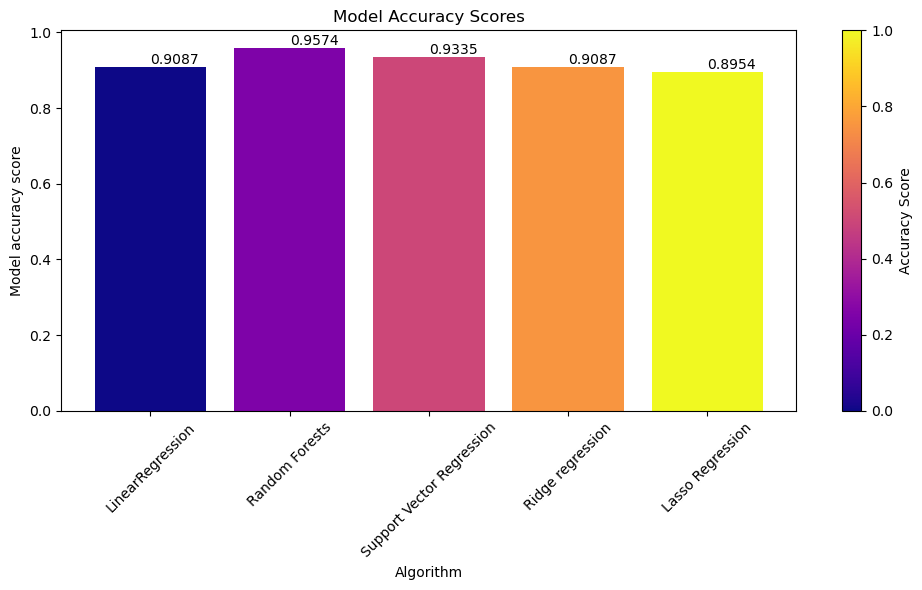

In [14]:
colors = plt.cm.plasma(np.linspace(0, 1, len(my_labels)))


plt.figure(figsize=(10, 6))
bars = plt.bar(my_labels, Accuracy_score, color=colors)


for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 4), va='bottom')

plt.xlabel('Algorithm')
plt.ylabel('Model accuracy score')
plt.title('Model Accuracy Scores')

plt.colorbar(plt.cm.ScalarMappable(cmap='plasma'), label='Accuracy Score')


plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



# Applying Grid search CV for hyperparameter Tuning:
# Parameter Tuning for Ridge:

Hyperparameter tuning: 
Ridge/Lasso regression: Choosing alpha
Hyperparameters: Parameters we specify before fitting the model
Like alpha and n_neighbors.

In [15]:
X = scaled_data.drop(["LV ActivePower (kW)"],axis=1)

y = scaled_data[["LV ActivePower (kW)"]]


# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 123)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

param_grid = {"alpha" : np.arange(0.0001,1,10),
              "solver": ["sag","lsqr"]}

ridge = Ridge()
ridge_cv = GridSearchCV(ridge,param_grid,cv=kf)
ridge_cv.fit(X_train,y_train)

print(ridge_cv.best_params_,ridge_cv.best_score_)

test_score = ridge_cv.score(X_test,y_test)
print(test_score)

{'alpha': 0.0001, 'solver': 'sag'} 0.9069712063614404
0.9086786818301914


# Applying RandomizedSearchCV

In [16]:
X = scaled_data.drop(["LV ActivePower (kW)"],axis=1)

y = scaled_data[["LV ActivePower (kW)"]]


# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 123)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

param_grid = {"alpha" : np.arange(0.0001,1,10),
              "solver": ["sag","lsqr"]}

ridge = Ridge()
ridge_cv = RandomizedSearchCV(ridge,param_grid,cv=kf)
ridge_cv.fit(X_train,y_train)

print(ridge_cv.best_params_,ridge_cv.best_score_)

test_score = ridge_cv.score(X_test,y_test)
print(test_score)

C:\Users\16088\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


{'solver': 'lsqr', 'alpha': 0.0001} 0.906971137844662
0.9086782213392313


# Conclusion

In this project our target variable is continous variable. Because of this reason, we used regression models instead of classification models. We used these models:
    LinearRegression
    Random Forests
    Support Vector Regression
    Ridge regression
    Lasso Regression
We splitted the data like that %80 of the data are used for training. Our data actually involve in a time series. 0.8 is enough for training.
We have evaluated each models in terms of model accuracy score and plotted them. The best model is  Random Forests.


#  Future Direction

Here we have used only the data of one year. The model can be improved, if we can use the data from another year.